### And welcome to Week 4, Day 3 - more LangGraph..

In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain_openai import ChatOpenAI
from typing import TypedDict

In [2]:
# Our favorite first step! Crew was doing this for us, by the way.
load_dotenv("/Users/alex/Desktop/00_projects/AI_agents/my_agents/.env", override=True)


True

### First, let's go set up LangSmith!

https://langsmith.com

And we are now going to go and set up LangSmith. So there's a link to LangSmith here. When you follow this link, you'll get to their website. And the first thing you'll need to do is create an account. And it's free. It's free as long as you stay within some very high number, which we definitely will. So you can set that up. And when you come in, you're going to get this sort of dashboard, a bit like this, except it will be empty. And the first thing to do is to press the Setup Tracing button right here. 

![](../img/39.png)

And this is going to fly up. You have to generate an API key so that you've got an API key. And as soon as you press that, it will then fill this in down here. And you just simply will then want to copy that to your clipboard, all of your fields, all of the key variables that you'll see here. But just don't, obviously, don't take the OpenAI API key as well. You don't need that. But you need this. 

![](../img/40.png)

And then it will actually populate that API key with whatever you generate right here, which is great. And then you will go back here into your .env file, which is just there. And you will add this in to your .env file so that we have these variables set. And then once you've done that, come back and run load.env again so that they load in. 

---
Maybe I should have done that in the other order. So that's great. Then you have Langsmith configured, and you'll be able to see things. Now, before we go further, I will just talk through a few things we can expect to see. So I called the project Mastering Agents. You can call it whatever you want, of course. And you can see in here, there's lots of stuff that I've been doing. You'll see that for every time that I've invoked LandGraph, I get some sort of an entry here. I get the input and the output. If there's an error, which I had a couple of errors, then we will see them. It tells you when it happened. It tells you the latency, which is very helpful. And there's a bunch of other useful stuff here too, which we don't often get to see. The cost in this column is telling us how much this costs us to make this call to OpenAI. And for those people that are concerned about API costs, do have a look at how insanely small these numbers are. It just really brings it to life. I realize that the main problem people have is with the upfront $5 you have to put in at the beginning. But I hope that you see that until you get to such a point as you are scaling, we are talking about not just fractions of a cent, but fractions of fractions of a cent for most of these. It also tells you the number of tokens, which is helpful to know. I'm not sure if these zeros were because I had some bug, but luckily they're fixed. So you get to see a bunch of stuff in here. And this is going to be useful. And when we actually have things to look at, we will come back and take a look at that. 

---

### Next, here is a useful function in LangChain community:

So I found a useful function that's in the Lanchain community folder, and it's called Google SERPA API wrapper, which means there's a nice little convenient wrapper around the same thing that we set up before, this SERPA API, where we already have the API key in our M file, which is convenient to use. And so we can create an instance of this thing, Google SERPA API wrapper, and we could call SERPA.run with something like, what's the capital of France? And if we do this, then it will think for a moment. And indeed, we get Paris as the capital, largest city of France, and with some stuff about it from doing an Internet search on this, which is great. And again, this is something that's part of what's free and included in the plan up to several thousand calls, I think, unlike OpenAI, which is charging us two and a half cents for each one. So that is good. 

In [3]:
from langchain_community.utilities import GoogleSerperAPIWrapper

serper = GoogleSerperAPIWrapper()
serper.run("What is the capital of France?")

'Paris is the capital and largest city of France. With an estimated population of 2,048,472 in January 2025 in an area of more than 105 km2 (41 sq mi), ... Paris is the capital and most populous city of France. Situated on the Seine River, in the north of the country, it is in the centre of the Île-de-France ... Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris has 2.234 million inhabitants end 2011. The capital of France has been Paris since its liberation in 1944. Paris, city and capital of France, located along the Seine River, in the north-central part of the country. Paris is one of the world\'s most ... Paris is the city of romance par excellence, the fashion capital and the best example of French art de vivre. Exploring Paris is an essential rite of passage ... Paris, the capital of France, is often referred to as the "City of Light" and is renowned for its art, culture, and history. NARRATOR: The Eiffel Tower is the 

### Now here is a LangChain wrapper class for converting functions into Tools

Now, this is showing you some of the nice stuff that's actually in Lanchain rather than Langroth, but Langroth uses it too. I mentioned to you that Lanchain already does sort of simple agent interactions. It already gives some wrapper code, some abstraction code. And here is one of them. I kept the import here so we could see that it's from Lanchain. So you can say that you can wrap a function like this with a tool object. You give it a name, like search, a function, SERPA.run. That's what it will actually do when it needs to call this tool. And a description is what will be called when building the JSON around this tool. So that's wrapped it in a tool object, a Lanchain tool object. And as you can probably guess, this is going to take away all of the gumph about building that JSON object with all the stuff and properties and everything else. It's going to take care of all of that for us. 

In [4]:
from langchain.agents import Tool

tool_search =Tool(
        name="search",
        func=serper.run,
        description="Useful for when you need more information from an online search"
    )

### Now we can try out the tool the langchain way

So we can now try out the same question. What's the capital of France? Which we can do using toolsearch.invoke. The Lanchain way we are calling this tool. And there we go. We get an answer of the capital of France. Same thing. But now we're doing it by calling invoke. Okay. And now let's just show you what it's like to build a tool from scratch ourselves. It's super easy. 

In [5]:
tool_search.invoke("What is the capital of France?")

'Paris is the capital and largest city of France. With an estimated population of 2,048,472 in January 2025 in an area of more than 105 km2 (41 sq mi), ... Paris is the capital and most populous city of France. Situated on the Seine River, in the north of the country, it is in the centre of the Île-de-France ... Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris has 2.234 million inhabitants end 2011. The capital of France has been Paris since its liberation in 1944. Paris, city and capital of France, located along the Seine River, in the north-central part of the country. Paris is one of the world\'s most ... Paris is the city of romance par excellence, the fashion capital and the best example of French art de vivre. Exploring Paris is an essential rite of passage ... Paris, the capital of France, is often referred to as the "City of Light" and is renowned for its art, culture, and history. NARRATOR: The Eiffel Tower is the 

### And now let's write a tool ourselves

We'll pick a familiar one

So we'll use the same old thing that we like to do. This is nice. It's so tangible. Using pushover, this is the same kind of function. This is able to send a push notification to me. So we give it the usual doc string. We give it the information about it. And here we go. That's that. 

In [6]:
pushover_token = os.getenv("PUSHOVER_TOKEN")
pushover_user = os.getenv("PUSHOVER_USER")
pushover_url = "https://api.pushover.net/1/messages.json"

def push(text: str):
    """Send a push notification to the user"""
    requests.post(pushover_url, data = {"token": pushover_token, "user": pushover_user, "message": text})

I put that into a tool. Again, the same construct, the Lanchain construct. The name is send push notification. The function is push. And that's a description. And now I can then call toolpush.invoke with hello me. There we go. 

In [7]:
tool_push = Tool(
        name="send_push_notification",
        func=push,
        description="useful for when you want to send a push notification"
    )

tool_push.invoke("Hello, me")

### Bring them together

Hello me. So now we have made a tool ourselves. A custom tool. So now we have an off-the-shelf tool for searching using the same Serpa API. And we have a custom tool for sending a push notification using the nifty pushover package. Okay. And we can put both of these tools in a list of tools. 

In [8]:
tools = [tool_search, tool_push]

### Back to the Graph from yesterday

One small change - using TypedDict instead of BaseModel for the State object

When we implement tools, we always need to make 2 changes to the code:

1. Changes to provide the tools to OpenAI in json when we make the call

2. Changes to handle the results back: look for the model staying that the finish_reason=="tool_calls" and then retrieve the call, run the function, provide the results.


---

One small change I'm going to make, though, is this time, for the State object, we're not going to use a Pydantic object, we're going to use a TypedDict. And it looks almost identical, it's just a subclass of TypedDict instead of Pydantic, a base model. But otherwise, the same thing. Messages field, it's annotated, it's a list, and this is telling LandGraph that we're going to use the AddMessagesReducer as a way of reducing. Otherwise, it's just the same. So you can stick with Pydantic if you prefer, but this is a different way of doing it.

In [9]:
# Step 1: Define the State object
class State(TypedDict):
    messages: Annotated[list, add_messages]

So then we start the GraphBuilder right there,

In [10]:
# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)

So then we start the GraphBuilder right there, and now we have something different. So it's worth keeping in mind, in your mind, that when we work with tools, there's actually two different places in our code that typically we have to worry about tools. And I've explained this up here. First of all, when we're making the call to the model to open AI, that's the point at which we have to look at our tools and create all of that JSON nonsense, all of the stuff to describe what the tool is, so that when we prompt the model, it knows what it can do. So that's one piece of work that has to happen. And then another piece of work is when the model then responds, we have to test to see whether it's a finish reason, tool calls, and if so, then we have to do that stuff, which was the quite long-winded handle tool call method in the first week, where we unpacked the tool call, and then we did some clever stuff. You can either have just an if statement, or you can have something clever that goes and finds the function and calls it. But that whole piece of the puzzle, the receiving the message to call a tool from the model, is like another place where you have to do all of your coding. Those are the two points, and we'll see both those points separately in how we have to handle this with Langra. 


So this is the first one. When we create the model, this is the chat open AI object, which is the Lang chain wrap-up around calling open AI. We also, once we've created this, we make another version of LLM, which is LLM with tools, which is after calling bind tools to the LLM. And this is just some nice sort of magic, which is going to then figure out what are the tools that it can call, and make sure that whenever we call that model, whenever we call this version of the model, it's going to provide all of the tools it can do. So it's one of those examples. This is really powerful. It's Lang chain here, and it's Lang chain being really nice at making it simple to package away all of that JSON stuff, and do it for us by abstracting around an LLM to have an LLM with tools, which whenever you call it, it's going to automatically pass in all the tools it can call. The flip side of that is that it's sort of hiding from us some of the implementation and some of what's going on, which can make it hard to debug and things. But you certainly, I mean, hopefully you see the positives very much. It's really easy. That is done. Now whenever we call LLM with tools, it's going to automatically handle the building of that JSON and the passing it in. 

In [11]:
# This is different:

llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

This is our node, our function for the chatbot, which just as before, we return messages. And then what we've got here is we just call invoke, but not on the LLM, but on the LLM with tools that knows already about those tools. It will build the JSON. It will pass the JSON in as the tools. So it's really clever. And then we add that node. 


And then there's this line here. This is part two. This is the other thing. This is handling the results back. So what's happening here is that we added that chatbot node. We're adding a second node called tools. And it is a special type of node. It's a tool node. And when you create a tool node, you have to tell it, okay, what are these tools? What is it that you do? And this tool node is basically like a canned node that when it's invoked, it's going to see whether any of the message is asking to call one of the tools that it's been assigned, that was passed to it when it was created. That's the job of the tool node. And if so, it will run them. So one more time, this piece of code here is handling the request to the LLM and packaging up the tools JSON. And this node here is handling what happens if there is a tool request. It's handling the unbundling of the request and the actual calling of the tool function.

In [12]:
# Step 3: Create a Node


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

Surely, we're going to create the edges now, and again, a little bit more complicated than before. So, there is an edge which is going from the chatbot to the tools, from this node, which is the actual chatbot, the LLM with tools, to the thing that calls tools, to the node that actually runs the different tools. We need to connect those two. But that connection, it's a connection which has like an if attached to it. We don't want to always call tools. We only want to call those tools if the model has returned a response that the finish reason is tool calls. We had to like code that ourselves in week one, if finish reason is tool calls. So that if has to be included in here, because it's only if that's true, it's only if the model returns that it wants to call tools that we actually want to call this node. And so, that is why, when you look at this edge, it's not a normal edge, it's called `add_conditional_edges`, which means it's an edge that's only triggered in certain conditions, like an if statement, and you give it the node name, you give it the condition, and you give it the node that would then be called. And that condition, called `tools _condition`, is again pre-canned with Langraph, and of course it looks to see if the finish reason is handle tools. And so, sorry, the finish reason is tool calls. And so that is what, that's exactly what that does. So when I used to say that at the end of the day, tool calling is just an if statement, this is the if statement. This thing here is handling that if statement, and if this if statement is true, then it's calling a node called tools. 

In [13]:
# Step 4: Create Edges
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")

All right, and then there's one more quite subtle point here, which is that you also have to make an edge between tools back to chatbot again, because the result of this, the result of running the tool, the output, needs to get fed back into the chatbot, and it needs to continue processing from there. So this is subtle, and once I've said it, it's probably obvious, but it's one of those things that if I hadn't said it, it's not something that would naturally have occurred to you, and if you don't do it, then things will go wrong in strange ways. So it's one of those times again, it's elegant, it's neat, it's great that Langraph does that, but it can make it a bit harder to debug. All right, and then we're going to add that start edge

In [14]:
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

and then we're going to compile and picture it, and this will hopefully bring this together for you. Start goes to chatbot. This is a conditional line. If the finish reason is a tool call, then it will come here, because the tool's condition will be true. Then it will be responsible, this node is a canned node that's responsible for calling the tools that are relevant, and then the result comes back, and this is a solid line, because if it's got here, it should always come back. And this is a dotted line, because only in the event that this didn't happen, then it will come to end naturally. Langraph automatically adds an end node for any unresolved condition like that. And so that is our graph, and I hope that seeing that graph has made it come together for you. So the two places where tools are incorporated, one is the chatbot itself, we're using the LLM with tools, and the other is in the conditional branch and this tools node itself.

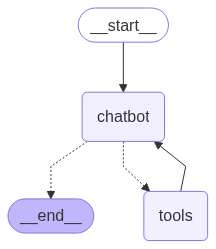

In [15]:
# Step 5: Compile the Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

### That's it! And, let's do this:

Well, I think it's enough chit-chat. We should get on and run this thing. So here we go. We're going to... I think I'll make this consistent with how we've done it before. We'll call this Chat, not InvokeGraph, but it is how we should think of it, really. So we're going to bring up a radio screen, and we're just going to call it. Let's see if this works. Okay, so I'm going to say hi there. Hello, how can I assist you today? Well, I'm going to do something fun here. I'm going to say, please send me a push notification with the current US dollar to Great British Pound exchange rate. So I'm hoping that it's going to look up the exchange rates by doing a web search, find it out, and then send me a push notification. This is ambitious. Two tool calls in one shot. Get that out of me. And we'll see how it does. So it's going. It's off. It's pausing. As you heard, it certainly sent me something. The current US dollar GBP exchange rate is 0.78. Well, I happen to have a Google screen sitting over here. Let's bring this into view. There you will find the current US dollar GBP exchange rate is indeed 0.78. So that's cool. That's cool. I hope you agree. Sorry, get that out of your way. I hope you agree. It's interesting to see that this has happened and that it's achieved this. And what we can see here is that we can come into Langsmith and see the outcome of this. I'm interested that it's put that in red, the four seconds that it took. So let's go into this and see more. Please send me a push notification with the current US dollar GBP exchange rate. So we can see that you can see the whole graph playing out here.

In [16]:
def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]})
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


![](../img/41.png)

So, we can see that, you can see the whole graph playing out here, and it's fascinating to see. Let's scroll down. It's doing a search right here, click here, current USDT-GPT exchange rate, and that's the result that came back. This is from doing the search, just as we expected, and then it came back to a tools condition to a send push notification, and back came the answer, and then that was the conclusion. There we go, and that's how it responded. So there we see the full chain of discussion happening within Langsmith, and how you can come in and debug this, and see what's going on, and see, indeed, convince yourself that it did call the couple of tools. And this was great fun, and I hope you'll do the same thing. Come in now, and run this, let it call both tools, go into Langsmith, and trace through to make sure that you can also see all of these calls happening, just as we did right here.

![](../img/42.png)

And I've come into length, spent one more time just to show you, I think I read from the wrong place there. The final output from GPT was right down here. I have sent you a push notification of the current USDGP exchange rate. So that's where you saw the end of the whole of the trace, right down at the bottom there. 

![](../img/44.png)

Okay, so here we are back in this chat. And now let me just show you something, despite its incredible intelligence with this conversation. What we can now say is, my name's Alex. Nice to meet you, Alex. How can I assist you today? And I can say, what's my name? And it says, I don't have access to your personal information. 

![](../img/43.png)

So I use this as a way of showing you that despite the fact that we have all of this state management, despite the fact that we've built up these reducers and this clever structure, it doesn't have any memory. It doesn't have the ability to remember between the different conversations. And you might be thinking, well, I guess you're not thinking because I explained it already, but if I hadn't explained it, you might be thinking, but hang on, we've got all these reducers, we've got all of this stuff to handle state and to add in state. Why isn't it just naturally remembering what's happening? And yes, it's all down to **super steps**. 

The point is that every invocation, every time we call this graph, it's like a separate, fresh invocation, and state is managed and maintained within any one invocation. That's what it's there for. It's to handle so that you can have multiple nodes running in parallel, you can have all sorts of stuff happening, and the state will be managed through the whole graph in a reproducible way. That's the power of the state management part. But that doesn't help you between separate super steps. Each **Super-Step** is a different invocation of the graph, and the way that you do this is you use **checkpointing**. That's how you add memory. 

Well, I have to tell you, I have some misgivings about Landgraf from time to time, how heavyweight it can be on occasion, and some of the things we have to learn. But this is one case where I am very impressed indeed, and it's a moment for me when I get it. I realize why people like this so much, and I can really appreciate the power of it. Checkpointing is very elegant, very simple, and it leads to robust, repeatable processes. And you will see that too, and I imagine you'll be impressed like me at the end of it.

## OK it's time to add Memory!

### BUT WAIT!

We have this whole Graph maintaining the state and appending to the state.

Why isn't this handling memory?

### This is a crucial point for understanding LangGraph

> A super-step can be considered a single iteration over the graph nodes. Nodes that run in parallel are part of the same super-step, while nodes that run sequentially belong to separate super-steps.


One "Super-Step" of the graph represents one invocation of passing messages between agents.

In idomatic LangGraph, you call invoke to run your graph for each super-step; for each interaction.

The reducer handles state updates automatically within one super-step, but not between them.

That is what checkpointing achieves.

---
So, we begin by creating a new object called MemorySaver. Now, MemorySaver doesn't mean, like, saving memories. It's talking about saving to in-memory stores, to in-memory rather than to disk or to a database. That's a bit confusing. So that's what MemorySaver means. 

In [17]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

And this is the same code we had before, exactly the same code. I put in a print statement so we can see what it's doing. And otherwise, the only change is when we compile the graph, we pass in checkpointer equals memory. We're passing in that memory object. There's our graph. It looks identical, exactly the same.

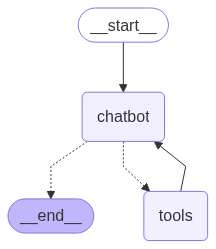

In [18]:
# Steps 1 and 2
graph_builder = StateGraph(State)


# Step 3
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    print(state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

# Step 4
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

# Step 5
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

And now, this is where we actually run the code. There's a little bit of stuff here, which is a bit hacky, a bit hokey. But the idea is you have to create this object called config. It's a dictionary with one field, configurable. And in that field, you have to put in a thread ID. And thread ID doesn't mean, like, a technical thread. It's meant to be, like, a conversation thread. Like, it's something that refers to this set of thread of memories that needs to be connected together. And so that's how you specify that this is this particular grouping in memory. 

And then, when you invoke the graph, you have to pass in that config. That's how you make sure that when you're invoking the graph, it's being associated with the right sort of slot in memory. And that is all there is to it. 

In [19]:
config = {"configurable": {"thread_id": "1"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='What´s my name?', additional_kwargs={}, response_metadata={}, id='038ea49a-73d8-4b96-b15a-655ff617e7e8')]}


So, with that, let's bring this up. And will you say hi there? Hello. I can assist you today. My name's Ed. Nice to meet you, Ed. How can I help you? What's my name? I think it's going to get it. Your name is Ed. How can I help you further? And no surprise, you can see down here, the print statement that I mentioned is printing out the inputs. And we're getting the full history each time. And that is all there is to it. That is checkpointing in action. Maintaining memory between each of the calls, each of the super steps. Now, I know what you're thinking. You're thinking, oh, yeah, what's the big deal? Why are you so impressed by this? I mean, it's just like, you could also get that just by storing that list of dicks. Or we could take it from Gradio's UI here and put it in a global link and keep playing it in. Well, look. Look at some of this stuff.

![](../img/45.png)

So you can call graph, the compiled graph, .getState, given the config, and we get back this thing called a state snapshot. And this has in it the messages and then the complete, the conversation so far. Alright, so it's like a global that has this in it. But there's more. 

In [21]:
graph.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='My name is Alex', additional_kwargs={}, response_metadata={}, id='e012c408-97e5-4e8f-9f81-eb848d821cac'), AIMessage(content='Nice to meet you, Alex! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 92, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BxaDCezTZz5MixsKXk4SPskQPtwJE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--06459512-66fc-42bb-9de3-f02bb0aa20d0-0', usage_metadata={'input_tokens': 92, 'output_tokens': 15, 'total_tokens': 107, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'r

You can get .getStateHistory for our config. And what we get now is each step in time, every super step, every time we invoke the graph, the complete snapshot at that moment, starting from most recent at the top and then going back in time. And this is where it gets cool. And it's not like it's super sophisticated, but it's definitely a cool construct. LangChain allows you to step back in time to any prior moment. When you're passing in that config, the configurable, the thread ID, you can pass in a checkpoint ID to kind of rewind to a previous moment and then replay that through the graph. And this gives you this ability to basically do what they call time travel. That's the Lang Graph official name for it, which is really to be able to move back, get your snapshot at any point in time, and be able to rerun it from there. And this is really great because it allows you to build systems that are repeatable and robust. If something falls over, you can restart it from any snapshot, any point in time, and you've got this kind of full tracking on everything that happened. So, yeah, it's simple, but it's elegant, and this is a case of an abstraction that really makes sense to me. And it's definitely something that I think is very valuable. 

In [22]:
# Most recent first

list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='My name is Alex', additional_kwargs={}, response_metadata={}, id='e012c408-97e5-4e8f-9f81-eb848d821cac'), AIMessage(content='Nice to meet you, Alex! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 92, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BxaDCezTZz5MixsKXk4SPskQPtwJE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--06459512-66fc-42bb-9de3-f02bb0aa20d0-0', usage_metadata={'input_tokens': 92, 'output_tokens': 15, 'total_tokens': 107, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, '

I just want to show you as well that this has got nothing to do with Gradio and with kind of variables. I can come back in and I can just relaunch my Gradio UI right here. And I can say like, hi there. It says, hi again, Ed. I was going to say, what's my name, but I don't need to. You can see right away, it's got the memory. It's still got that memory. It's got nothing to do with the information stored in Gradio's chat UI, which is what we've always used in the past with Gradio. But rather, it is the memory, the checkpointing that's happening inside this memory object. And then I can actually, I can come back and if I recreate, I can create a fresh new memory saver object and come in and then I have to rebuild my graph with the new memory right there and then re-bring up my chat interface. And now if I say, hi there, and what's my name, it's obviously not going to know it. So that just explains that by recreating a new memory object, we've reset everything. And that gives you a good sense of what's going on. My name's Ed. Nice to meet you, Ed. How can I assist you today? What's my name? Just to prove the point, your name is Ed. And then let me just show one more thing here. We can also change the thread ID to 2. Let's re-run this and take a look here. Say hi there. Hello, how can I assist you? What's my name? And it says it doesn't know because the thread is 2. If we now go back to the thread is 1, I know you can get this, but it's worth saying. And now hi there. Hello again, Ed. So there you see it. It's a nice, elegant, it's relatively lightweight and simple, but very powerful. And that's a nice combination that I can get behind. And you can come in and look, of course, at the different checkpoints but either thread number 1 or thread number 2 using this same structure.

![](../img/46.png)

### LangGraph gives you tools to set the state back to a prior point in time, to branch off:

```
config = {"configurable": {"thread_id": "1", "checkpoint_id": ...}}
graph.invoke(None, config=config)
```

And this allows you to build stable systems that can be recovered and rerun from any prior checkpoint.

### And now let's store in SQL

### And this is the power of LangGraph.

And now for my next trick, and our last trick of the day. I'm going to switch it to store it in SQL instead. Our memory is going to be a SQL database. And again, this is impressive stuff. It's great that it's so simple and easy to switch to using SQL. We just import this SQLite saver instead, and we're going to write to a memory.db. 

In [20]:
import sqlite3
from langgraph.checkpoint.sqlite import SqliteSaver

db_path = "memory.db"
conn = sqlite3.connect(db_path, check_same_thread=False)
sql_memory = SqliteSaver(conn)

We connect that way. We come in, and it's just exactly the same code, but we're, of course, putting in the SQL memory instead of the memory before. I mean, it's a different name of a variable, but it's exactly the same approach as we had before. Nothing different there at all. 

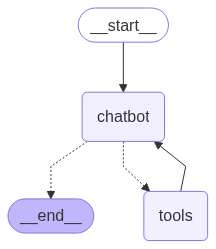

In [21]:
# Steps 1 and 2
graph_builder = StateGraph(State)


# Step 3
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    print(state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

# Step 4
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

# Step 5
graph = graph_builder.compile(checkpointer=sql_memory)
display(Image(graph.get_graph().draw_mermaid_png()))
 

There we go. I'm going to make the thread ID a different ID because it's in SQL. It's kind of remember from my tests. But then we can come in, and we can say, hi there. And how can I assist you today? What's my name? And I don't have access. My name's Ed. Nice to meet you, Ed. How can I assist you today? All right. So with that, we can now go back here, and this time we can just recreate the whole thing from scratch. It's like I could restart my kernel. 

In [22]:
config = {"configurable": {"thread_id": "3"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi there', additional_kwargs={}, response_metadata={}, id='d6144090-9963-438c-b21b-3fb4f06edbc0'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 90, 'total_tokens': 101, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'id': 'chatcmpl-BInN7JUnEYNTQqokCF3eihp5oKP0V', 'finish_reason': 'stop', 'logprobs': None}, id='run-4b488710-73ac-435e-a944-913a0c812d08-0', usage_metadata={'input_tokens': 90, 'output_tokens': 11, 'total_tokens': 101, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content="what's my name", additional_kwargs

: 

![](../img/47.png)

I should restart my kernel. Why don't I do that? You'll have to bear with me. We will restart kernel, clear all outputs. We'll go all the way back up to the top, run our imports. We will load the .env. I guess I should load in the tools again because we're going to use these. Do this. Do this. Get the pushover. Message me. My phone's on silent. Bring them together. Get our state object because we reused that at various points. And now from this point onwards, I think now we can now go back here. So we're completely fresh. So now we're going to recreate this. We are going to rebuild our graph builder. There it is. And here we go. And hi there. Hello again, Alex. 

There you have it. Restart the kernel, completely bring everything fresh, and, of course, it knows who I am, and it knows that because you can see right here in this directory, there's a bunch of database objects. It's storing it in a SQLite database, and so we have persistent memory with changing, like, one word from my code, and I think that is really impressive. And I realize just before we close this, I should also show that the tools are working and in action, so after saying this, let's do the same thing. Please send me a push notification with the current USD2BP exchange rate. Let's let it do its thing. Off it goes, and I just got a push notification, and it says 0.78. There we go. 

![](../img/50.png)

So, success. I think maybe... What if I say that I can... I'm trying to think about how we can use memory as well. Can you send that push notification again, please? Let's try that. There we go. I got another push notification with the same thing. So there, I had to think for a moment. There's a demonstration of both memory and tool calling in one shot with the right answer. Success. And you can see the various calls happening down there. So that, then, is a wrap on this, and it might be nice for us just to... Okay. To bring that up in Langsmith just to see those calls. And so here we are in Langsmith looking at that most recent request, and it's good to see that, as I was hoping to see, it did use the tool to send the push notification. It didn't bother doing the search again because it had that in its memory, and you can see at the bottom here that it sends that push notification, and it then confirms back there that it did it, just as we saw in the chat, and you can see all of the history that it's got up above it. So you can see in Langsmith that, true to its word, everything is working. The memory is working. The tool call is working, and it knew that it already knew the exchange rate. So I'd say that that is a success. And to wrap up, let me show you one more time this great picture, which now, I hope, lands nicely with you. We define our graph. We've run each super step with each interaction, and these red lines are showing the checkpointing that's happening so that we can resume at any point. We can replay the state as it was then. We can time travel back, and we can persist this in a database so that it maintains knowledge of the conversation, and it's keyed up this thread ID. And with that, that concludes day three, and it was a meaty day. We covered a lot of ground, and I hope that you're building some of the same enthusiasm that I'm growing as we get into this for Landgraft and seeing the strengths, seeing how resilient, how robust it is, and this discipline that it puts around the process. But that's enough of the learning and the concepts. Next time, we launch into our project, a project called Sidekick, and it's a really great one. I can't wait to show it to you. See you then.

![](../img/48.png)